# TP3: Técnicas de Machine Learning para clasificar datos de EEG

<p style="text-align: justify;">
En el marco de la materia optativa *Ciencia de Datos* estudiamos técnicas de Machine Learning aplicadas a datos adquiridos mediante electroencefalografía (EEG). En la [página web de la materia](http://www.dc.uba.ar/materias/cienciadatos) se encuentran disponibles los [datos](http://calamaro.exp.dc.uba.ar/~fraimondo/cienciadatos/data/) utilizados, así como también las [referencias teóricas](http://www.dc.uba.ar/materias/cienciadatos/teoricas) y la [guía](https://gist.github.com/fraimondo/9f779d083a47c18800130ca8d1b143b9) para el desarrollo de los análisis correspondientes. <br>

<p>
En el presente trabajo aplicamos técnicas de Machine Learning univariadas (una variable/feature) y multivariadas (mutiples variabes/features) para entrenar clasificadores supervisados que permitan discriminar grupos de datos de EEG a partir de ciertos atributos o *features*.
</p> 

## Tabla de Contenidos 

<!-- MarkdownTOC autolink=true autoanchor=true bracket=round -->

- [1. Datos](#datos)
    - [1.1. Preprocesado](#preprocesado)
    - [1.2. Features](#features)  
    - [1.3. Paquetes](#paquetes)  
- [2. Machine Learning](#ml)
    - [2.1. Análisis Univariado](#univariado)
    - [2.2. Análisis Multivariado](#multivariado)
<!-- /MarkdownTOC -->

<a name="datos"></a>
## 1. Datos

<p style="text-align: justify;">
La técnica de electroencefalografía (EEG) consiste en medir la actividad eléctrica del cerebro. Para su medición, se utilizan electrodos (sensores) que se ubican en el cuero cabelludo. Cada electrodo mide en forma independiente las fluctuaciones de voltaje, generando una señal analógica que es amplificada y luego digitalizada. Los sistemas de EEG suelen variar en cantidad y ubicación de los electrodos, y en la frecuencia de muestreo. Los datos utilizados en este trabajo provienen de un sistema de EEG con 256 electrodos de solucion salina digitalizados a 250 Hz. Los mismos corresponden a una evaluación cognitiva realizada a 20 sujetos, de los cuales el 50% posee capacidades cognitivas normales (Grupo S), mientras que los resultados para el 50% restante determinaron que poseen capacidades cognitivas severamente disminuidas (Grupo P). Cada evaluación dura aproximadamente 30 minutos, en los cuales son estimulados auditivamente aproximadamente unas 1200 veces.
</p> 

<a name="preprocesado"></a>
## 1.1. Preprocesado <a id='preprocesado'></a>

<p style="text-align: justify;">
Uno de los principales problemas del EEG es su naturaleza ruidosa. Los voltajes que se miden en el cuero cabelludo son una mezcla de actividad eléctrica del cerebro, actividad muscular (EMG) y ruido del ambiente. Se denomina artefactos a toda fluctuacion de voltaje registrado que no proviene de actividad neuronal. La tarea de "limpiar" los datos comunmente se denomina preprocesamiento. Existen varios metodos y mecanismos para aislar la actividad neuronal, aunque no hay una única solución óptima. Los detalles de procesamiento de desarrollan a continuación:
<ol>
  <li> Los datos son filtrados en 4 pasos consecutivos:</li>
  <ul>
    <li> Highpass en 0.5 Hz (butterworth de orden 6).</li>
    <li> Lowpass en 45 Hz (butterworth de orden 8).</li>
    <li> Notch en 50 Hz.</li>
    <li> Notch en 100 Hz.</li>
  </ul>  
  <li> La grabación continua de 30 minutos es cortada tomando como parámetro el inicio de la estimulación auditiva (T0). Cada segmento (denominado epoch o trial) tiene una duración de 1.54 segundos y comienza 200 ms antes de T0. En otras palabras, cada epoch comienza en -0.200s y termina en 1.34s donde 0s es la ocurrencia de un estímulo auditivo. </li>
  <li> Para poder comparar los epochs, se realiza lo que se denomina Baseline Correction. En los 200ms previos al estímulo auditivo, todos los epochs están en un periodo de reposo (no hay estimulación). La técnica de baseline correction consiste en centrar en cero la media durante ese periodo para cada electrodo. </li>
  <li> Epochs y electrodos con artefactos son descartados por un metodo automatizado basado en peak-to-peak amplitude y detección de electrodos con alta varianza. </li>
  <li> Los datos son re-referenciados utilizando average reference. </li>
  <li> La información de los electrodos que fueron descartados en el punto 4 es obtenida interpolando los vecinos para que todos los EEG contengan la misma cantidad de electrodos (256). </li>
</ol>
</p> 

<a name="features"></a>
## 1.2. Features

<p style="text-align: justify;">
En el presente trabajo se utilizan técnicas de _machine learning_ univariadas y multivariadas con el objetivo de clasificar los sujetos de los grupos S y P estudiados previamente en el trabajo anterior.<br>

A partir de los análisis realizados anteriormente, elegimos ciertos atributos o propiedades de las series temporales adquiridas mediante EEG. Los features se definen y calculan en un [notebook aparte](https://github.com/m2march/ciencia_datos/blob/master/tp3/Feature%20Processing.ipynb). Los features utilizados son:
    <li> Potencia de bandas espectrales. </li>
    <li> Potencia de bandas espectrales normalizadas. </li>
    <li> Entropía intra-electrodos. </li>
    <li> Entropía inter-electrodos. </li>
Para cada una de ellas se calcularon su promedio (entre trials) y desvío standard obteniéndose así 24 features en total. Las mismas fueron guardadas en la carpeta [pickles](https://github.com/m2march/ciencia_datos/tree/master/tp3/pickles).
</p> 

<a name="paquetes"></a>
## 1.3. Paquetes

<p style="text-align: justify;">
Cargamos los paquetes de Python necesarios para el análisis.
</p> 

In [1]:
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
import pickle
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn import svm
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [3]:
#rcParams['axes.facecolor']="white"
#rcParams['axes.edgecolor']="k"
#rcParams['axes.xmargin'] = 0
#rcParams['axes.ymargin'] = 0
#rcParams['axes.grid'] = True
#rcParams['grid.color'] = 'k'
#rcParams['grid.linestyle'] = ':'
#rcParams['grid.linewidth'] = 1
#rcParams['xtick.direction'] = 'in'
#rcParams['ytick.direction'] = 'in'
#rcParams['xtick.top'] = True
#rcParams['ytick.right'] = True

<a name="ml"></a>
## 2. Machine Learning

<a name="univariado"></a>
## 2.1. Análisis Univariado

La curva ROC (_receiver operating characteristic_) es un gráfico que muestra la habilidad de un clasificador binario. Básicamente es la relación entre la proporción de los verdaderos positivos y de los falsos positivos. Para cuantificar esta magnitud se utiliza el área bajo la curva (AUC).

A continuación se procederá a calcular y presentar las curvas ROC correspondientes a los 24 features.

In [22]:
def roc_univariado(valores, etiquetas, etiqueta_true):
    """
    Args:
        valores valores del feature de interes
        etiquetas etiquetas para cada valor
        etiqueta_true etiqueta a la que corresponde cuando el valor es mayor al umbral
        
    Returns:
        umbrales
        tprs
        fprs
        area bajo la curva roc
        tnrs
    """
    m = min(valores)
    M = max(valores) 
    n = 100
    xs = np.linspace(m, M * 1.01, n)
    tprs = []
    fprs = []
    tnrs = []
    for idx in range(n):
        ts = np.array((valores >= xs[idx]).values)
        
        tp = np.sum(etiquetas[ts] == etiqueta_true)
        fp = np.sum(etiquetas[ts] != etiqueta_true)
        tn = np.sum(etiquetas[np.invert(ts)] != etiqueta_true)
        fn = np.sum(etiquetas[np.invert(ts)] == etiqueta_true)
        
        tpr = tp / (tp + fn) #sensitivity
        fpr = fp / (fp + tn)
        tnr = tn / (tn + fp) #specificity
        
        tprs.append(tpr)
        fprs.append(fpr)
        tnrs.append(tnr)
        
    tprs = np.array(tprs)
    fprs = np.array(fprs)
    tnrs = np.array(tnrs)

    aroc = metrics.roc_auc_score([c == etiqueta_true for c in etiquetas], valores)
        
    return (xs, tprs, fprs, aroc, tnrs)

In [47]:
def plot_rocs(ax, _title, args):
    """
    Grafica las curvas roc.
    
    Args:
        args: lista de (nombre, fprs, tprs, auc)
    """
    sca(ax)
    for nombre, fprs, tprs, auc in args:
        plot(fprs, tprs, lw=2, alpha=0.5, label='{} AUC = {:.2f}'.format(nombre, auc))
        
    plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    xlabel('True Positive Rate')
    ylabel('False Positive Rate')
    legend(loc='lower right')
    title(_title)

In [24]:
etiquetas = np.array(['P'] * 10 + ['S'] * 10)

Se cargan los valores de todos los atributos:

In [25]:
band_mean = pd.read_pickle('pickles/band_power_mean.pkl')
band_std = pd.read_pickle('pickles/band_power_std.pkl')
band_norm_mean = pd.read_pickle('pickles/band_power_norm_mean.pkl')
band_norm_std = pd.read_pickle('pickles/band_power_norm_std.pkl')
intra_entropy = pd.read_pickle('pickles/intra_entropy.pkl')
inter_entropy = pd.read_pickle('pickles/inter_entropy.pkl')

A modo de ejemplo y para clarificar el comportamiento de una curva ROC, se grafica a continuación únicamente las curvas correspondientes al promedio entre trials de las potencias de bandas espectrales.

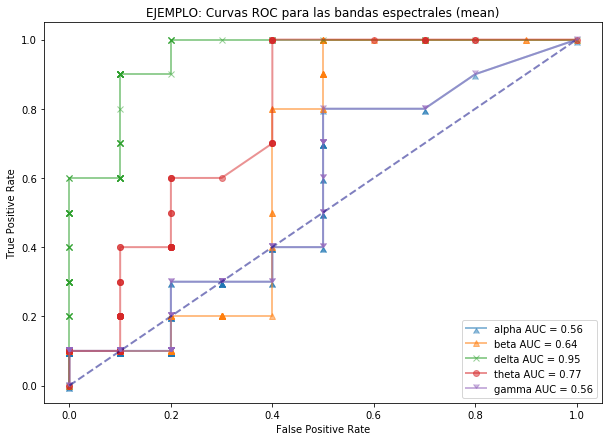

In [43]:
xs_a, tprs_a, fprs_a, aroc_a, tnrs_a = roc_univariado(band_mean['alpha'], etiquetas, 'S')
xs_b, tprs_b, fprs_b, aroc_b, tnrs_b = roc_univariado(band_mean['beta'], etiquetas, 'S')
xs_d, tprs_d, fprs_d, aroc_d, tnrs_d = roc_univariado(band_mean['delta'], etiquetas, 'P')
xs_t, tprs_t, fprs_t, aroc_t, tnrs_t = roc_univariado(band_mean['theta'], etiquetas, 'P')
xs_g, tprs_g, fprs_g, aroc_g, tnrs_g = roc_univariado(band_mean['gamma'], etiquetas, 'S')

plt.figure(figsize=(10, 7))
plot(fprs_a, tprs_a, lw=2, marker=6, alpha=0.5, label='alpha AUC = {:.2f}'.format(aroc_a))
plot(fprs_b, tprs_b, lw=2, marker='^', alpha=0.5, label='beta AUC = {:.2f}'.format(aroc_b))
plot(fprs_d, tprs_d, lw=2, marker='x', alpha=0.5, label='delta AUC = {:.2f}'.format(aroc_d))
plot(fprs_t, tprs_t, lw=2, marker='o', alpha=0.5, label='theta AUC = {:.2f}'.format(aroc_t))
plot(fprs_g, tprs_g, lw=2, marker=7, alpha=0.5, label='gamma AUC = {:.2f}'.format(aroc_g))
plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', alpha=0.5)
xlabel('False Positive Rate')
ylabel('True Positive Rate')
legend(loc='lower right')
title('EJEMPLO: Curvas ROC para las bandas espectrales (mean)')
plt.show()

En el gráfico se observa que, dentro de esta categoría de atributos, la banda espectral delta es la que mejor clasifica los sujetos con un AUC de 0.95. Por su parte las bandas alpha y gamma presentan una precisión similar, superponiéndose sus curvas en todo momento, y resultando sus AUCs muy cercanas a la del azar. Por último las bandas beta y theta tienen un comportamiento regular respecto a la clasificación.

A continuación se prosigue de modo similar y se presentan todas las curvas ROCs:

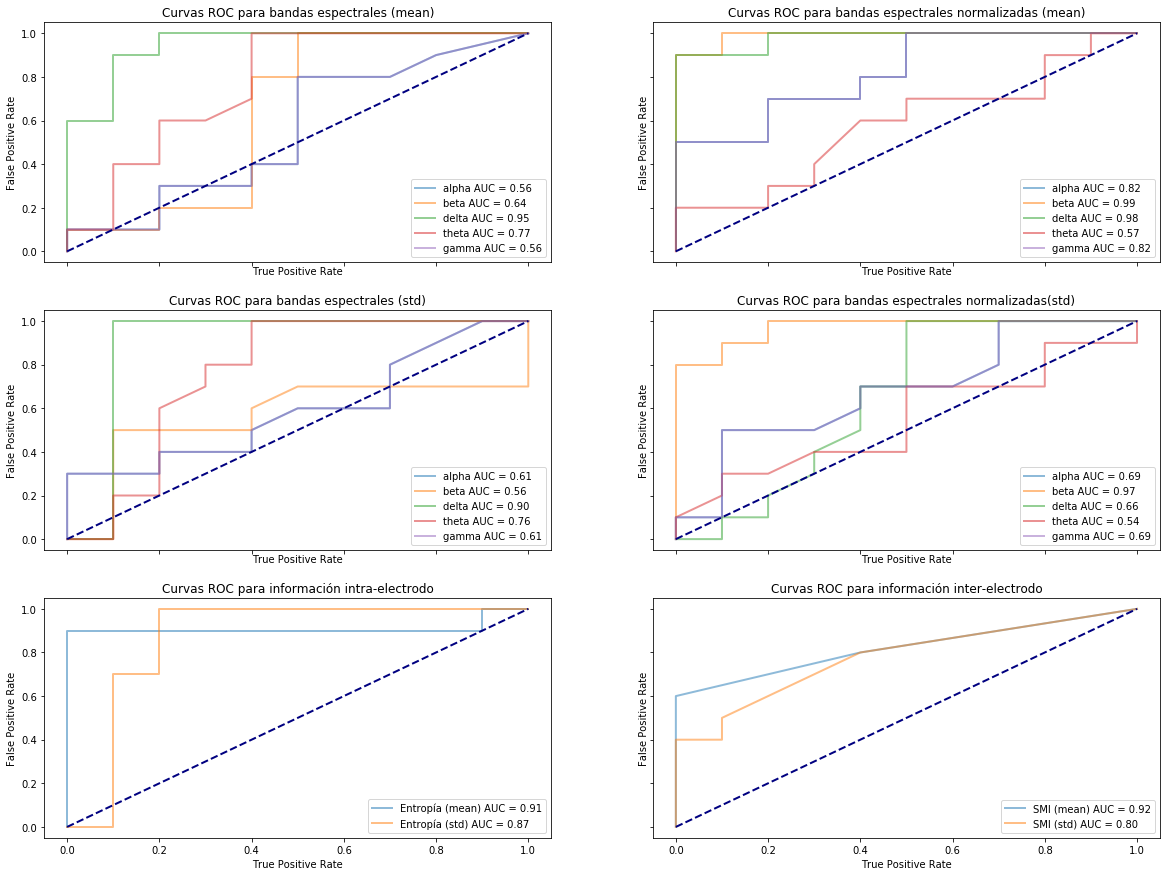

In [59]:
fig, axs = plt.subplots(3, 2, figsize=(20, 15), sharex=True, sharey=True)
#bandas espectrales (mean)
xs_a, tprs_a, fprs_a, aroc_a, tnrs_a = roc_univariado(band_mean['alpha'], etiquetas, 'S')
xs_b, tprs_b, fprs_b, aroc_b, tnrs_b = roc_univariado(band_mean['beta'], etiquetas, 'S')
xs_d, tprs_d, fprs_d, aroc_d, tnrs_d = roc_univariado(band_mean['delta'], etiquetas, 'P')
xs_t, tprs_t, fprs_t, aroc_t, tnrs_t = roc_univariado(band_mean['theta'], etiquetas, 'P')
xs_g, tprs_g, fprs_g, aroc_g, tnrs_g = roc_univariado(band_mean['gamma'], etiquetas, 'S')
plot_rocs(axs[0][0], 'Curvas ROC para bandas espectrales (mean)',
         [('alpha', fprs_a, tprs_a, aroc_a),
          ('beta', fprs_b, tprs_b, aroc_b),
          ('delta', fprs_d, tprs_d, aroc_d),
          ('theta', fprs_t, tprs_t, aroc_t),
          ('gamma', fprs_g, tprs_g, aroc_g),
         ])

#bandas espectrales normalizadas (mean)
xs_a, tprs_a, fprs_a, aroc_a, tnrs_a = roc_univariado(band_norm_mean['alpha'], etiquetas, 'S')
xs_b, tprs_b, fprs_b, aroc_b, tnrs_b = roc_univariado(band_norm_mean['beta'], etiquetas, 'S')
xs_d, tprs_d, fprs_d, aroc_d, tnrs_d = roc_univariado(band_norm_mean['delta'], etiquetas, 'P')
xs_t, tprs_t, fprs_t, aroc_t, tnrs_t = roc_univariado(band_norm_mean['theta'], etiquetas, 'S')
xs_g, tprs_g, fprs_g, aroc_g, tnrs_g = roc_univariado(band_norm_mean['gamma'], etiquetas, 'S')
plot_rocs(axs[0][1], 'Curvas ROC para bandas espectrales normalizadas (mean)',
         [('alpha', fprs_a, tprs_a, aroc_a),
          ('beta', fprs_b, tprs_b, aroc_b),
          ('delta', fprs_d, tprs_d, aroc_d),
          ('theta', fprs_t, tprs_t, aroc_t),
          ('gamma', fprs_g, tprs_g, aroc_g),
         ])

#bandas espectrales (std)
xs_a, tprs_a, fprs_a, aroc_a, tnrs_a = roc_univariado(band_std['alpha'], etiquetas, 'P')
xs_b, tprs_b, fprs_b, aroc_b, tnrs_b = roc_univariado(band_std['beta'], etiquetas, 'P')
xs_d, tprs_d, fprs_d, aroc_d, tnrs_d = roc_univariado(band_std['delta'], etiquetas, 'P')
xs_t, tprs_t, fprs_t, aroc_t, tnrs_t = roc_univariado(band_std['theta'], etiquetas, 'P')
xs_g, tprs_g, fprs_g, aroc_g, tnrs_g = roc_univariado(band_std['gamma'], etiquetas, 'P')
plot_rocs(axs[1][0], 'Curvas ROC para bandas espectrales (std)',
         [('alpha', fprs_a, tprs_a, aroc_a),
          ('beta', fprs_b, tprs_b, aroc_b),
          ('delta', fprs_d, tprs_d, aroc_d),
          ('theta', fprs_t, tprs_t, aroc_t),
          ('gamma', fprs_g, tprs_g, aroc_g),
         ])

#bandas espectrales normalizadas (std)
xs_a, tprs_a, fprs_a, aroc_a, tnrs_a = roc_univariado(band_norm_std['alpha'], etiquetas, 'S')
xs_b, tprs_b, fprs_b, aroc_b, tnrs_b = roc_univariado(band_norm_std['beta'], etiquetas, 'S')
xs_d, tprs_d, fprs_d, aroc_d, tnrs_d = roc_univariado(band_norm_std['delta'], etiquetas, 'S')
xs_t, tprs_t, fprs_t, aroc_t, tnrs_t = roc_univariado(band_norm_std['theta'], etiquetas, 'P')
xs_g, tprs_g, fprs_g, aroc_g, tnrs_g = roc_univariado(band_norm_std['gamma'], etiquetas, 'S')
plot_rocs(axs[1][1], 'Curvas ROC para bandas espectrales normalizadas(std)',
         [('alpha', fprs_a, tprs_a, aroc_a),
          ('beta', fprs_b, tprs_b, aroc_b),
          ('delta', fprs_d, tprs_d, aroc_d),
          ('theta', fprs_t, tprs_t, aroc_t),
          ('gamma', fprs_g, tprs_g, aroc_g),
         ])

#entropia intra-electrodo (mean y std)
xs_intra_mean, tprs_intra_mean, fprs_intra_mean, aroc_intra_mean, tnrs_intra_mean = roc_univariado(intra_entropy['mean'], etiquetas, 'S')
xs_intra_std, tprs_intra_std, fprs_intra_std, aroc_intra_std, tnrs_intra_std = roc_univariado(intra_entropy['std'], etiquetas, 'P')
plot_rocs(axs[2][0], 'Curvas ROC para información intra-electrodo',
         [('Entropía (mean)', fprs_intra_mean, tprs_intra_mean, aroc_intra_mean),
          ('Entropía (std)', fprs_intra_std, tprs_intra_std, aroc_intra_std),
         ])

#entropia inter-electrodo (mean y std)
xs_inter_mean, tprs_inter_mean, fprs_inter_mean, aroc_inter_mean, tnrs_inter_mean = roc_univariado(inter_entropy['mean'], etiquetas, 'S')
xs_inter_std, tprs_inter_std, fprs_inter_std, aroc_inter_std, tnrs_inter_std = roc_univariado(inter_entropy['std'], etiquetas, 'S')
plot_rocs(axs[2][1], 'Curvas ROC para información inter-electrodo',
         [('SMI (mean)', fprs_inter_mean, tprs_inter_mean, aroc_inter_mean),
          ('SMI (std)', fprs_inter_std, tprs_inter_std, aroc_inter_std),
         ])

En los paneles en los que se presentan las curvas ROC relacionadas con medidas de las potencias de bandas espectrales, ya sean promedios o desvíos standard o bien las potencias normalizadas, se encuentra que las bandas alpha y gamma siempre poseen el mismo comportamiento. En el caso del primer panel (promedio de bandas espectrales) y como ya fue mencionado anteriormente, estas bandas tienen un desempeño similar al del azar (AUC = 0.56) el cual mejora un 46% al normalizar dichas potencias (AUC = 0.82). También se observa una notable mejoría en la banda espectral beta al normalizar alcanzando un AUC = 0.99 y para el caso de la banda delta AUC = 0.98. Únicamente la banda theta mostró un desempeño peor parala clasificación en el caso de la normalización.

Respecto a los desvíos standard, para las bandas no normalizadas, se encuentra, en general que estos atributos no son mejores que sus promedios excepto para las bandas alpha y gamma. Es decir, para estas bandas espectrales, sus fluctaciones son mejores clasificadores de sujetos que sus potencias medias. A pesar de esto, de esto sólo alcanzan un AUC de 0.61.

Las curvas ROC que presentan AUC más altas para el caso de los desvíos standard resultan ser la banda delta no normalizada (0.90) y la banda beta normalizada (0.97). 

Por su parte la banda espectral theta para el caso normalizado presenta un comportamiento similar al del azar con AUC = 0.57 (promedio) y AUC = 0.54 (std) habiéndolo disminuido respecto del no normalizado (AUCpromedio = 0.77 y AUCstd = 0.76).

Por último se comparan las curvas obtenidas para las medidas de entropía intra e inter electrodos. En ambos casos el promedio de estas magnitudes alcanza un AUC de 0.91 y 0.92 respectivamente mientras que para los desvíos standard la entropía intra-electrodos tiene AUC = 0.87 y entropía inter-electrodo de 0.80.

A continuación se resumen en la siguiente tabla los features que mejor precisión han alcanzado (AUC $>=$ 0.90) durante el análisis univariado estudiado mediante las correspondientes curvas ROC y sus AUCs.

In [35]:
pd.DataFrame({
    'AUC':{
        'delta (mean)': 0.95,
        'delta (std)': 0.90,
        'beta norm (mean)': 0.99,
        'delta norm (mean)': 0.98,
        'beta norm (std)': 0.97,
        'entropia intra (mean)' : 0.90,
        'entropia inter (mean)': 0.92
    }
})

,AUC
beta norm (mean),0.99
beta norm (std),0.97
delta (mean),0.95
delta (std),0.90
delta norm (mean),0.98
entropia inter (mean),0.92
entropia intra (mean),0.90


## 2.1.b. Logistic Regression

In [76]:
etiquetas_binarias = [c == 'P' for c in etiquetas]

PONER UN CASO COMO EJEMPLO

AGREGAR CV

In [77]:
def plot_roc_logistic(ax, _title, args):
    """
    Calcula la regresion logística y plotea las rocs
    
    Args:
        args: lista (nombre, valores)
    """
    args_roc = []
    for nombre, values in args:
        lrc = linear_model.LogisticRegression()
        r_values = values.reshape(-1, 1)
        lrc.fit(X=r_values, y=etiquetas_binarias)
        y_score = lrc.decision_function(r_values)
        fpr, tpr, trs = metrics.roc_curve(etiquetas_binarias, y_score)
        auc = metrics.roc_auc_score(etiquetas_binarias, y_score)
        args_roc.append((nombre, fpr, tpr, auc))

    plot_rocs(ax, _title, args_roc)

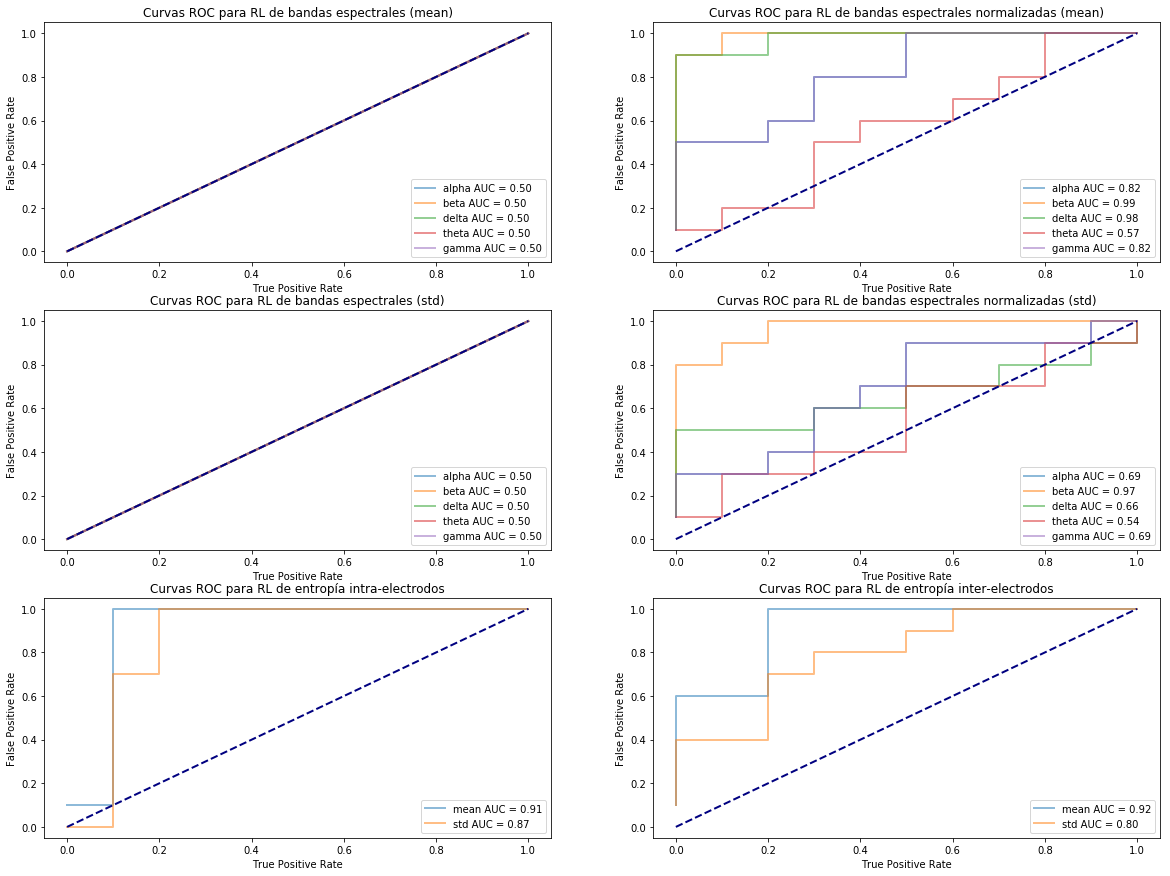

In [133]:
fig, axs = plt.subplots(3, 2, figsize=(20, 15))
plot_roc_logistic(axs[0][0], 'Curvas ROC para RL de bandas espectrales (mean)',
                 [('alpha', band_mean['alpha'].values),
                  ('beta', band_mean['beta'].values),
                  ('delta', band_mean['delta'].values),
                  ('theta', band_mean['theta'].values),
                  ('gamma', band_mean['gamma'].values),
                 ])

plot_roc_logistic(axs[0][1], 'Curvas ROC para RL de bandas espectrales normalizadas (mean)',
                 [('alpha', band_norm_mean['alpha'].values),
                  ('beta', band_norm_mean['beta'].values),
                  ('delta', band_norm_mean['delta'].values),
                  ('theta', band_norm_mean['theta'].values),
                  ('gamma', band_norm_mean['gamma'].values),
                 ])

plot_roc_logistic(axs[1][0], 'Curvas ROC para RL de bandas espectrales (std)',
                 [('alpha', band_std['alpha'].values),
                  ('beta', band_std['beta'].values),
                  ('delta', band_std['delta'].values),
                  ('theta', band_std['theta'].values),
                  ('gamma', band_std['gamma'].values),
                 ])

plot_roc_logistic(axs[1][1], 'Curvas ROC para RL de bandas espectrales normalizadas (std)',
                 [('alpha', band_norm_std['alpha'].values),
                  ('beta', band_norm_std['beta'].values),
                  ('delta', band_norm_std['delta'].values),
                  ('theta', band_norm_std['theta'].values),
                  ('gamma', band_norm_std['gamma'].values),
                 ])

plot_roc_logistic(axs[2][0], 'Curvas ROC para RL de entropía intra-electrodos',
                 [('mean', intra_entropy['mean'].values),
                  ('std', intra_entropy['std'].values),
                 ])

plot_roc_logistic(axs[2][1], 'Curvas ROC para RL de entropía inter-electrodos',
                 [('mean', inter_entropy['mean'].values),
                  ('std', inter_entropy['std'].values),
                 ])

VER LOS GRAFICOS DE BANDAS ESPECTRALES XQ CAE SOBRE LA DIAGONAL DEL AZAR.

In [120]:
lrc = linear_model.LogisticRegression()

In [122]:
lrc = lrc.fit(X=band_mean['alpha'].values.reshape(-1, 1), y=etiquetas_binarias)

In [117]:
y_score = lrc.decision_function(band_mean['alpha'].values.reshape(-1, 1))

In [132]:
band_norm_mean['alpha'].values.reshape(-1,1)

array([[0.061780896342268979],
       [0.034836210277248925],
       [0.012877926997098436],
       [0.013437502098363615],
       [0.0776431492354418],
       [0.0089150740532649882],
       [0.057315486506112442],
       [0.023301364304232203],
       [0.07300357357417972],
       [0.019098910269132692],
       [0.1484173213021068],
       [0.045858912316977203],
       [0.030237032983989033],
       [0.069691877066997351],
       [0.027091527387863044],
       [0.067122189508904806],
       [0.094368194039362849],
       [0.15796108717793353],
       [0.15687445240722098],
       [0.095483162817968981]], dtype=object)

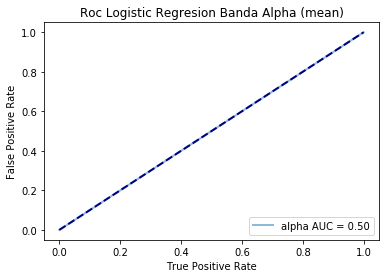

In [72]:
fpr, tpr, trs = metrics.roc_curve(etiquetas_binarias, y_score)
auc = metrics.roc_auc_score(etiquetas_binarias, y_score)
plt.figure()
plot_rocs(gca(), 'Roc Logistic Regresion Banda Alpha (mean)',
          [('alpha', fpr, tpr, auc)])

<a name="multivariado"></a>
## 2.2. Análisis Multivariado

Cargamos todos los atributos obtenidos previamente y armamos los vectores de features.

In [14]:
band_means = pd.read_pickle('pickles/band_power_mean.pkl')
band_std = pd.read_pickle('pickles/band_power_std.pkl')
band_norm_mean = pd.read_pickle('pickles/band_power_norm_mean.pkl')
band_norm_std = pd.read_pickle('pickles/band_power_norm_std.pkl')
intra_entropy = pd.read_pickle('pickles/intra_entropy.pkl')
inter_entropy = pd.read_pickle('pickles/inter_entropy.pkl')

In [15]:
etiquetas = np.array(['P'] * 10 + ['S'] * 10)

In [16]:
etiquetas_binarias = np.array([c == 'P' for c in etiquetas])

In [17]:
features = pd.concat([band_means,band_std,band_norm_mean,band_norm_std,intra_entropy,inter_entropy], axis=1)

De esta manera, generamos una matriz de features, donde las filas son los samples o sujetos y las columnas son las features o atributos.

In [14]:
features.shape

(20, 24)

In [37]:
def plot_decision(scores, etiquetas_binarias):
    """Plotea los puntos según su etiqueta y distancia al hiperplano de corte"""
    sns.swarmplot(etiquetas_binarias, y_score)
    for y, e in zip(y_score, etiquetas_binarias):
        axhline(y, xmin=-1, xmax=1, color='orange' if e else 'blue', alpha=0.3, lw=1)
    axhline(0, xmin=-1, xmax=1, color='grey', lw=1)
    title('Distancia de los datos al hiperplano de corte')

Score: 0.95


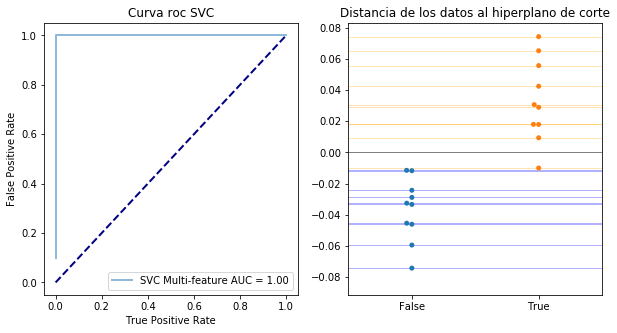

In [67]:
classifier = svm.SVC().fit(features, etiquetas_binarias)
print('Score:', classifier.score(features, etiquetas_binarias))
y_score = classifier.decision_function(features)
fpr, tpr, tps = metrics.roc_curve(etiquetas_binarias, y_score)
auc = metrics.roc_auc_score(etiquetas_binarias, y_score)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
plot_rocs(axs[0], 'Curva roc SVC', [('SVC Multi-feature', fpr, tpr, auc)])
sca(axs[1])
plot_decision(y_score, etiquetas_binarias)

In [69]:
y_pred = classifier.predict(features)      
pd.Series({
    'Accuracy': metrics.accuracy_score(etiquetas_binarias, y_pred),
    'F1': metrics.f1_score(etiquetas_binarias, y_pred)
})

Accuracy    0.950000
F1          0.947368
dtype: float64

###  Con separación train-test

Separo en subsets de entrenamiento y testeo

In [70]:
X_train, X_test, y_train, y_test = train_test_split(features, etiquetas_binarias, test_size=0.2, random_state=0)

Entreno el clasificador usando un kernel lineal

In [71]:
classifier = svm.SVC().fit(X_train, y_train)

Evalúo el clasificador en el subset de testeo

In [72]:
y_pred = classifier.predict(X_test)      
pd.Series({
    'Accuracy': metrics.accuracy_score(y_test, y_pred),
    'F1': metrics.f1_score(y_test, y_pred)
})

Accuracy    0.750000
F1          0.666667
dtype: float64

In [75]:
y_score = classifier.decision_function(X_test)

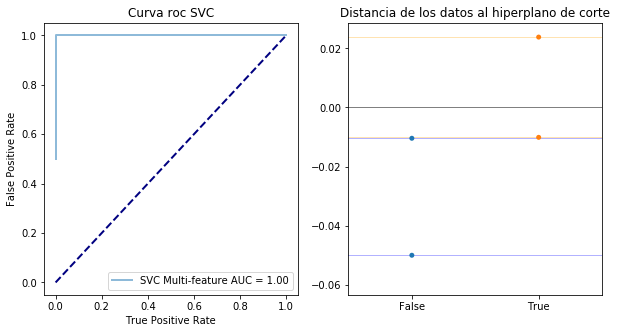

In [76]:
fpr, tpr, tps = metrics.roc_curve(y_test, y_score)
auc = metrics.roc_auc_score(y_test, y_score)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
plot_rocs(axs[0], 'Curva roc SVC', [('SVC Multi-feature', fpr, tpr, auc)])
sca(axs[1])
plot_decision(y_score, y_test)

### Cross-Validation

In [29]:
from sklearn.model_selection import cross_validate, KFold

In [40]:
scoring = ['accuracy', 'f1']
cv = KFold(n_splits=5, shuffle=True)
splits = cv.split(features, etiquetas_binarias)
scores = pd.DataFrame(columns=['F1', 'Accuracy'])
for train_idxs, test_idxs in splits:
    classifier = svm.SVC()
    classifier.fit(features.iloc[train_idxs], etiquetas_binarias[train_idxs])
    y_test = etiquetas_binarias[test_idxs]
    y_pred = classifier.predict(features.iloc[test_idxs])
    scores = scores.append(pd.Series({
        'F1': metrics.f1_score(y_test, y_pred),
        'Accuracy': metrics.accuracy_score(y_test, y_pred)
    }), ignore_index=True)
scores.append(pd.Series(scores.mean(), name='Mean')).T

/home/march/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/march/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


,0,1,2,3,4,Mean
F1,0.00,0.00,0.0,0.40,0.00,0.08
Accuracy,0.25,0.25,0.0,0.25,0.25,0.20


## 2.2.b. Pipeline

Standard Scaler.
Feature Selection utilizando solo el 10%.
SVC.

In [7]:
from sklearn import pipeline
from sklearn import preprocessing
from sklearn import svm
from sklearn import feature_selection
from sklearn import model_selection 

In [5]:
pipe = pipeline.Pipeline([('scale', preprocessing.StandardScaler()),
                          ('feature_selection', feature_selection.SelectPercentile(percentile=10)),
                          ('clf', svm.SVC())])

In [39]:
cv = model_selection.cross_validate(pipe, features, etiquetas_binarias, 
                                    cv=model_selection.KFold(n_splits=5), 
                                    scoring=['f1', 'accuracy'])
df = pd.DataFrame({'f1': cv['test_f1'], 'accuracy': cv['test_accuracy']})
df = df.append(pd.Series(df.mean(), name='Mean'))
df.T

/home/march/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


,0,1,2,3,4,Mean
accuracy,1.0,1.0,1.0,1.0,0.5,0.9
f1,1.0,1.0,1.0,0.0,0.0,0.6


#### Variamos la cantidad de features elegidos en 10, 20 y 35%

In [69]:
search = model_selection.GridSearchCV(
    estimator=pipe, 
    param_grid={'feature_selection__percentile': [10, 20, 35]},
    scoring=['f1', 'accuracy'],
    cv=KFold(n_splits=5, shuffle=True),
    refit=False)

In [70]:
res = search.fit(features, etiquetas_binarias)

In [75]:
f1_result_names = ['split0_test_f1', 'split1_test_f1', 'split2_test_f1', 'split3_test_f1', 'split4_test_f1']
f1_results = [res.cv_results_[k] for k in f1_result_names]
df = pd.DataFrame(f1_results, index=range(5), columns=['10%', '20%', '35%'])
df = df.append(pd.Series(df.mean(),  name='Mean'))
print('**F1 scores para distintos porcentajes de features**')
print('Columnas son los splits del CV')
print('Filas es el porcentaje de features utilizados')
df

**F1 scores para distintos porcentajes de features**
Columnas son los splits del CV
Filas es el porcentaje de features utilizados


,10%,20%,35%
0,1.000000,1.000000,1.000000
1,1.000000,1.000000,1.000000
2,0.800000,1.000000,1.000000
3,0.000000,0.000000,0.000000
4,0.857143,0.857143,0.857143
Mean,0.731429,0.771429,0.771429


In [74]:
acc_result_names = ['split0_test_accuracy', 'split1_test_accuracy', 
                    'split2_test_accuracy', 'split3_test_accuracy', 'split4_test_accuracy']
acc_results = [res.cv_results_[k] for k in acc_result_names]
df = pd.DataFrame(acc_results, index=range(5), columns=['10%', '20%', '35%'])
df = df.append(pd.Series(df.mean(),  name='Mean'))
print('**Accuracy scores para distintos porcentajes de features**')
print('Columnas son los splits del CV')
print('Filas es el porcentaje de features utilizados')
df

**Accuracy scores para distintos porcentajes de features**
Columnas son los splits del CV
Filas es el porcentaje de features utilizados


,10%,20%,35%
0,1.00,1.00,1.00
1,1.00,1.00,1.00
2,0.75,1.00,1.00
3,1.00,1.00,1.00
4,0.75,0.75,0.75
Mean,0.90,0.95,0.95
